In [1]:
import arviz as az
import numpy as np
from corner import corner


In [27]:
NUTS_data = az.from_json('./nuts_new')

In [28]:
# NUTS_data = NUTS_data.sel(chain=[0, 2])

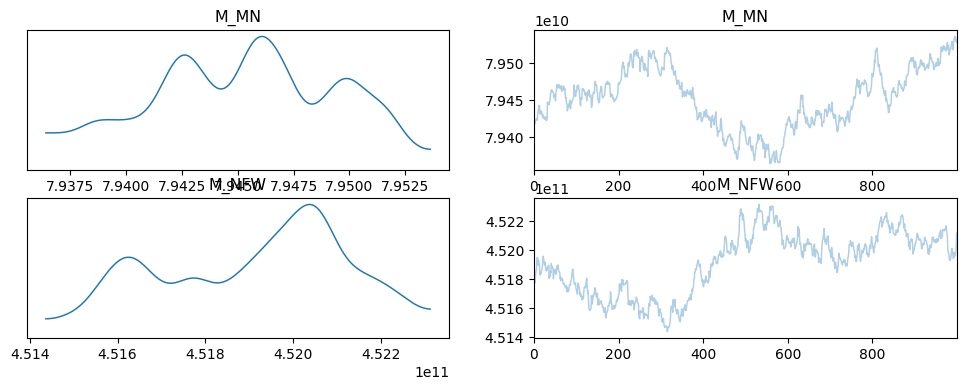

In [29]:
az.plot_trace(NUTS_data, compact=False);

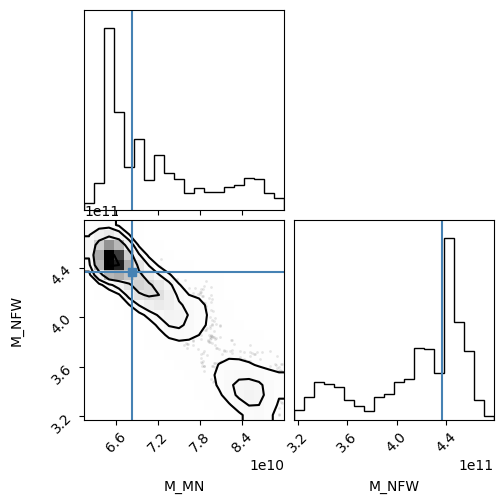

In [24]:
# True parameter values (without code_units transformation)
true_params = np.array([
    4.3683325e11,          # NFW Mvir (Msun)
    # 16.0,                  # NFW r_s (kpc)
    68_193_902_782.346756, # MN M (Msun)
    # 3.0,                   # MN a (kpc)
])
# true_params_dict = {'M_NFW': true_params[0], 'r_s': true_params[1], 'M_MN': true_params[2], 'a_MN': true_params[3]}

true_params_dict = {'M_MN': true_params[1],'M_NFW': true_params[0], }


figure = corner(NUTS_data,
                truths=true_params_dict,
                smooth=1.0,
                )

array([[<Axes: >, None],
       [<Axes: xlabel='M_MN', ylabel='M_NFW'>, <Axes: >]], dtype=object)

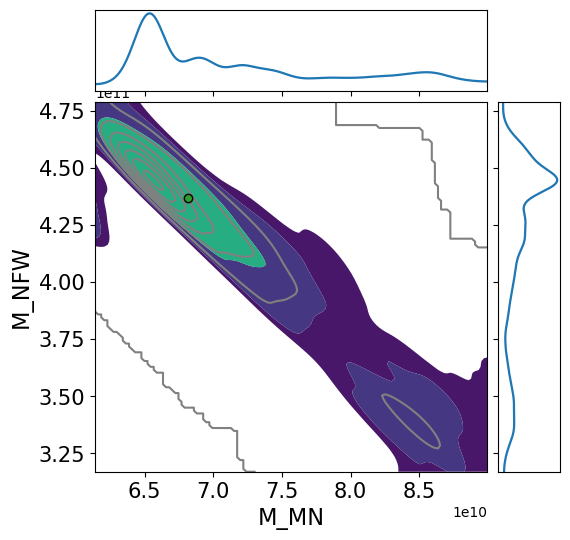

In [26]:
# Use ArviZ's pair plot instead
az.plot_pair(NUTS_data, 
             kind='kde',
             marginals=True,
             figsize=(6, 6),
            reference_values=true_params_dict,)

